In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import country_converter as coco
from matplotlib import pyplot as plt
from itertools import cycle, islice

In [2]:
EDITIONS = ["2000", "2001", "2002", "2003", "2004",
            "2005", "2006", "2007", "2008", "2009", 
            "2010", "2011", "2012", "2013", "2014",
            "2015", "2016", "2017", "2018", "2019",
            "2020", "2021", "2022", "2023", "2024"]

COLOR_LIST = ['darkblue', 'mediumblue', 'cornflowerblue', 
              'darkred', 'red', 'tomato', 'lightsalmon']

df = pd.read_csv("data/summary_dataset.csv")
print(df.shape)
print(df.columns)

(2483, 12)
Index(['Authors', 'Title', 'Year', 'Link', 'Abstract',
       'Authors with Affiliations', 'aff_names', 'Affiliation type',
       'Affiliation country', 'Western_flag',
       'First Author Affiliation UN Category', 'UN Categories'],
      dtype='object')


In [3]:
type_e = 0
type_f = 0
type_c = 0
type_ef = 0
type_ec = 0
type_fc = 0
type_efc = 0

type_lists = []

typeDict = {}
countryDict = {}

country_names = set()

for ed in EDITIONS:
    # print("###",ed)

    dfISMIRyear = df[df["Year"] == int(ed)]
    countryDict[ed] = {}

    for index, row in dfISMIRyear.iterrows():

        aff_types = [x.strip() for x in row["Affiliation type"].split(",")]
        aff_countries = [x.strip() for x in row["Affiliation country"].split(",")]

        # Check list lenghts
        it = iter([aff_types,aff_countries])
        the_len = len(next(it))
        if not all(len(l) == the_len for l in it):
             raise ValueError('not all lists have same length!')

        # Aff types
        if len(set(aff_types)) == 1:
            if "education" in aff_types:
                type_e += 1
            elif "facility" in aff_types:
                type_f += 1
            elif "company" in aff_types:
                type_c += 1
        elif len(set(aff_types)) == 2:
            if "education" in aff_types and "facility" in aff_types:
                type_ef += 1
            elif "education" in aff_types and "company" in aff_types:
                type_ec += 1
            elif "facility" in aff_types and "company" in aff_types:
                type_fc += 1
        elif len(set(aff_types)) == 3:
            type_efc += 1


        # Aff countries
        if len(set(aff_countries)) == 1:
            co = next(iter(set(aff_countries)))
            country_names.add(co)
            if co not in countryDict[ed]:
                countryDict[ed][co] = {"sc":1, "mc":0}
            else:
                countryDict[ed][co]["sc"] += 1
        else:
            for co in set(aff_countries):
                country_names.add(co)
                if co not in countryDict[ed]:
                    countryDict[ed][co] = {"sc":0, "mc":1}
                else:
                    countryDict[ed][co]["mc"] += 1



    type_list = [type_e, type_f, type_c, type_ef, type_ec, type_fc, type_efc]
    type_list_perc = [round(x*100/np.sum(type_list), 2) for x in type_list]

    typeDict[ed] = type_list_perc
    
    # print(type_list)
    # print(type_list_perc)
    # print(len(dfISMIRyear), len(countryDict[ed]))

CountryCountDict = {}
for co in country_names:
    if co == 'unknown':
        continue
    CountryCountDict[co] = [0,0]
    for ed in EDITIONS:
        if co in countryDict[ed]:
            CountryCountDict[co][0] += countryDict[ed][co]['sc']
            CountryCountDict[co][1] += countryDict[ed][co]['mc']

# Sort Dict Countries
temp1 = {val: sum(int(idx) for idx in key) 
           for val, key in CountryCountDict.items()}
# using sorted to perform sorting as required
temp2 = sorted(temp1.items(), key = lambda ele : temp1[ele[0]], reverse=True)
# rearrange into dictionary
CountryCountDictSorted = {key: CountryCountDict[key] for key, val in temp2 if key!="unknown"}

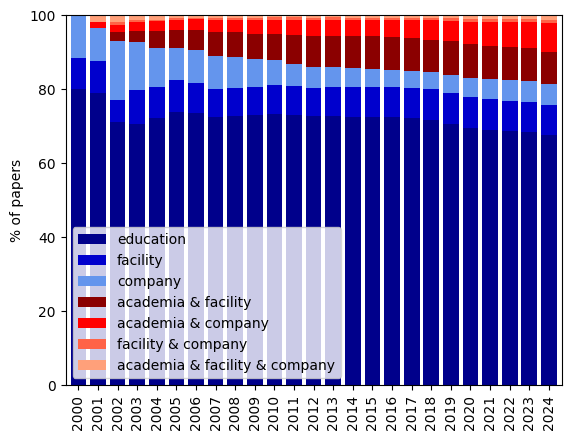

In [4]:
def plot_aff_type(typeDict):
    """
    """
    aff_df = pd.DataFrame.from_dict(typeDict, orient='index')
    my_colors = list(islice(cycle(COLOR_LIST), None, len(aff_df)))
    aff_df.plot(kind='bar', stacked=True, color=my_colors, width=.8)


    plt.ylabel('% of papers')
    plt.legend(['education','facility','company',
                'academia & facility','academia & company',
                'facility & company','academia & facility & company'])

    plt.title('')
    plt.ylim([0,100])
    plt.xticks(np.arange(25), EDITIONS, rotation=90, ha='center')
    plt.show()

plot_aff_type(typeDict)

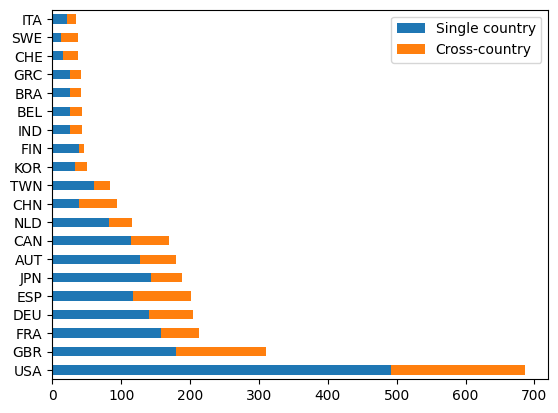

In [5]:
def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))
    
def plot_aff_country():
    """
    """

    aff_df = pd.DataFrame.from_dict(CountryCountDictSorted, orient='index')
    aff_df.plot(kind='barh', stacked=True)

    # plt.ylabel('number of papers')
    plt.legend(['Single country', 'Cross-country'])
    plt.title('')
    plt.ylim([-.5,19.5])
    plt.yticks(np.arange(20), 
                         [key for key, val in take(20,CountryCountDictSorted.items())], 
                         rotation=0)
    plt.show()

plot_aff_country()


Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


                      country country_code  \
0                   Indonesia          IDN   
1                    Malaysia          MYS   
2                       Chile          CHL   
3                     Bolivia          BOL   
4                        Peru          PER   
..                        ...          ...   
237                     Palau          PLW   
238                      Guam          GUM   
239  Northern Mariana Islands          MNP   
240                   Bahrain          BHR   
241               Macao S.A.R          MAC   

                                              geometry iso2_code Country  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID     NaN   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY     MYS   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL     NaN   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO     NaN   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   

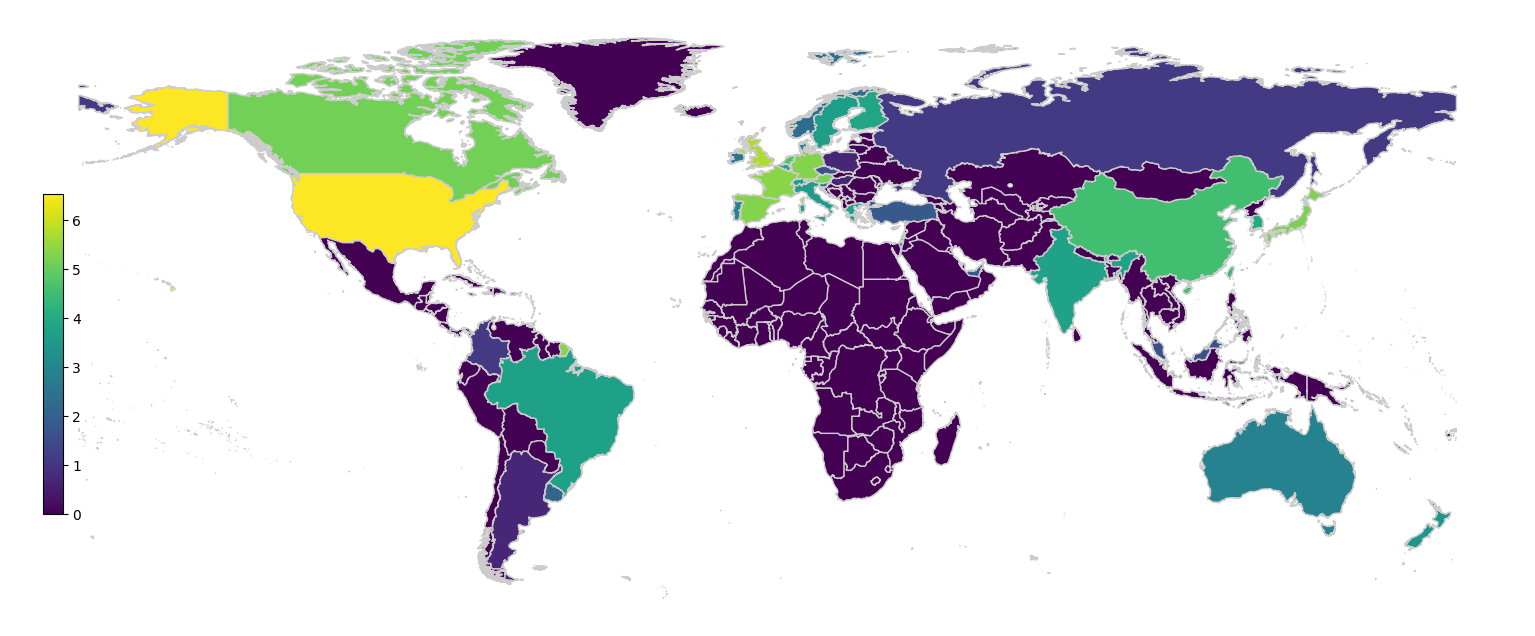

In [6]:
def plot_worldmap():
    """
    """
    # Setting the path to the shapefile
    SHAPEFILE = 'data/worldmap/ne_10m_admin_0_countries.shp'
    # Read shapefile using Geopandas
    geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
    # Rename columns.
    geo_df.columns = ['country', 'country_code', 'geometry']
    geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)


    iso3_codes = geo_df['country'].to_list()
    # Convert to iso3_codes
    iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
    # Add the list with iso2 codes to the dataframe
    geo_df['iso2_code'] = iso2_codes_list
    # There are some countries for which the converter could not find a country code. 
    # We will drop these countries.
    geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)


    CountryCountDictPlot = {key: val for key, val in temp2 if key!="unknown"}
    country_df = pd.DataFrame(list(CountryCountDictPlot.items()), columns=['Country', 'Value'])

    merged_df = pd.merge(left=geo_df, right=country_df, how='left', left_on='country_code', right_on='Country')

    merged_df["Value"].fillna(1, inplace=True)

    merged_df["Value"] = np.log(merged_df["Value"])
    print(merged_df)

    col = 'Value'
    vmin = merged_df[col].min()
    vmax = merged_df[col].max()
    cmap = 'viridis'
    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 8))
    # Remove the axis
    ax.axis('off')
    merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

    plt.show()

plot_worldmap()

# Ideas Juan
Following, you can find several ideas of additional analysis that could be shown in the paper. Please, let me know what you think.

In [7]:
df['Affiliation country'].dropna().str.split(',').explode().str.strip().unique()

array(['JPN', 'USA', 'GBR', 'MYS', 'FRA', 'TWN', 'GRC', 'AUS', 'DEU',
       'ESP', 'POL', 'NZL', 'FIN', 'ITA', 'CAN', 'IRL', 'BEL', 'CHN',
       'KOR', 'NLD', 'SVN', 'AUT', 'SGP', 'BRA', 'CHE', 'ISR', 'NOR',
       'DNK', 'ROU', 'PRT', 'unknown', 'VEN', 'HUN', 'URY', 'SRB', 'HKG',
       'IND', 'IRN', 'TUR', 'SWE', 'CYP', 'ARE', 'RUS', 'CZE', 'EST',
       'COL', 'UAE', 'ARG', 'VNM'], dtype=object)

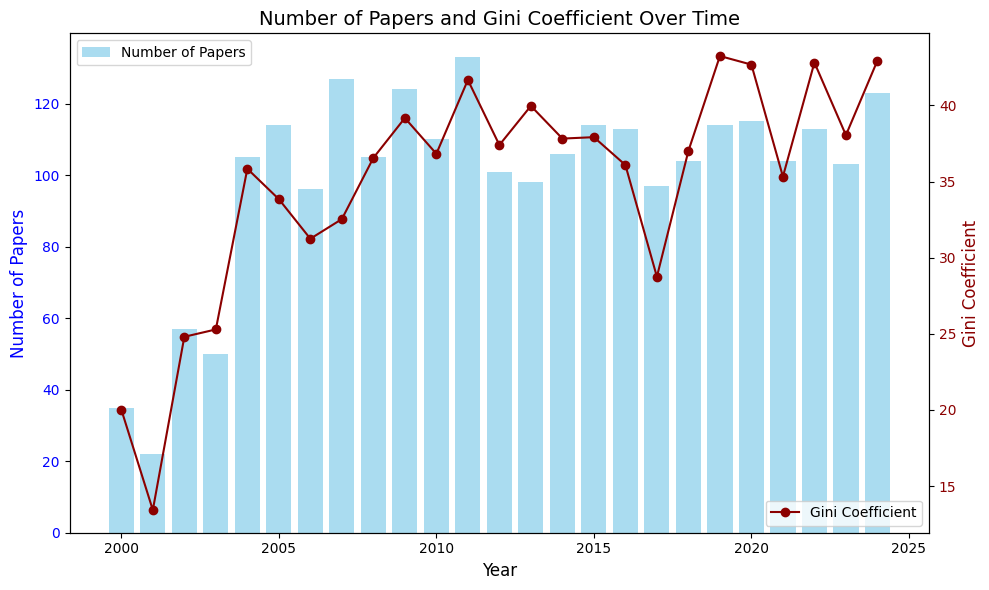

In [8]:
import seaborn as sns
import numpy as np

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.array(array, dtype=np.float64) 
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-10 
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return (2 * np.sum(index * array) / np.sum(array)) - (n + 1) / n

gini_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    country_counts = countries.value_counts()
    gini_coeff = gini(country_counts)
    gini_data.append((year, gini_coeff))


gini_df = pd.DataFrame(gini_data, columns=['Year', 'Gini_Coefficient'])
yearly_counts = df['Year'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Number of Papers and Gini Coefficient Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(gini_df['Year'], gini_df['Gini_Coefficient'], color='darkred', marker='o', label='Gini Coefficient')
ax2.set_ylabel('Gini Coefficient', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

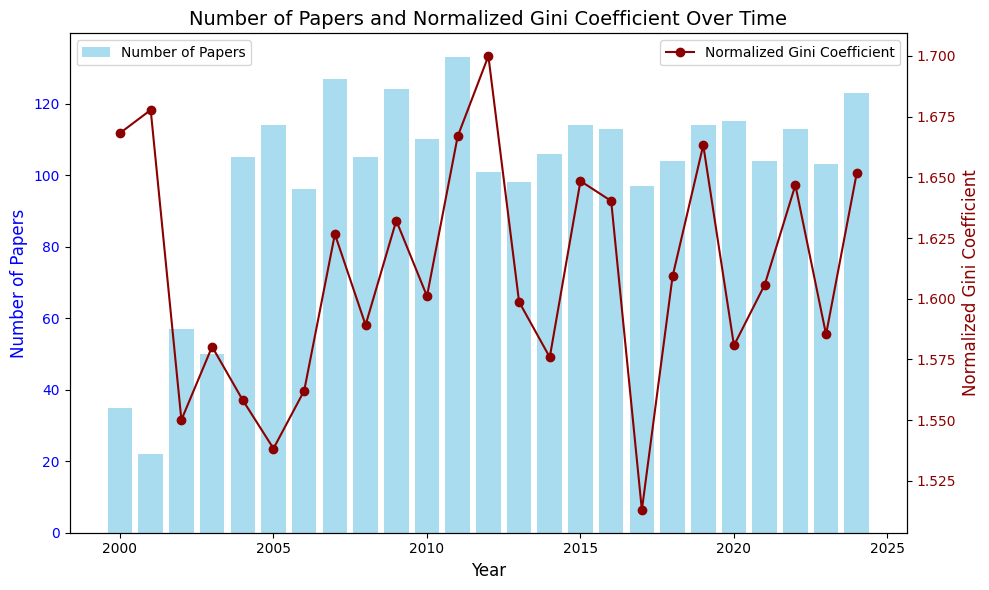

In [9]:
def normalized_gini(array):
    """Calculate the normalized Gini coefficient of a numpy array."""
    array = np.array(array, dtype=np.float64)
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-10 
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    gini_raw = (2 * np.sum(index * array) / np.sum(array)) - (n + 1) / n
    return gini_raw / (n - 1)  # Normalize the Gini coefficient

normalized_gini_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    country_counts = countries.value_counts()
    gini_coeff = normalized_gini(country_counts)
    normalized_gini_data.append((year, gini_coeff))

normalized_gini_df = pd.DataFrame(normalized_gini_data, columns=['Year', 'Normalized_Gini_Coefficient'])
yearly_counts = df['Year'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Number of Papers and Normalized Gini Coefficient Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(normalized_gini_df['Year'], normalized_gini_df['Normalized_Gini_Coefficient'], 
         color='darkred', marker='o', label='Normalized Gini Coefficient')
ax2.set_ylabel('Normalized Gini Coefficient', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

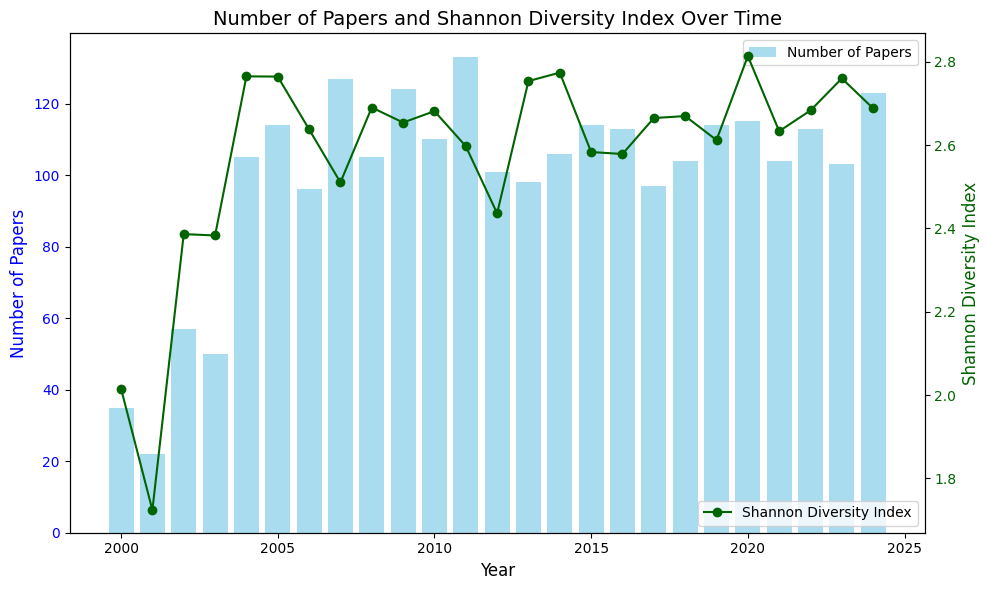

In [10]:
def shannon_diversity(proportions):
    """Calculate Shannon Diversity Index."""
    proportions = np.array(proportions, dtype=np.float64)
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

shannon_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    country_counts = countries.value_counts() 
    total_affiliations = country_counts.sum()
    proportions = country_counts / total_affiliations
    h_index = shannon_diversity(proportions)
    shannon_data.append((year, h_index))

shannon_df = pd.DataFrame(shannon_data, columns=['Year', 'Shannon_Diversity_Index'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Number of Papers and Shannon Diversity Index Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(shannon_df['Year'], shannon_df['Shannon_Diversity_Index'], color='darkgreen', marker='o', label='Shannon Diversity Index')
ax2.set_ylabel('Shannon Diversity Index', fontsize=12, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

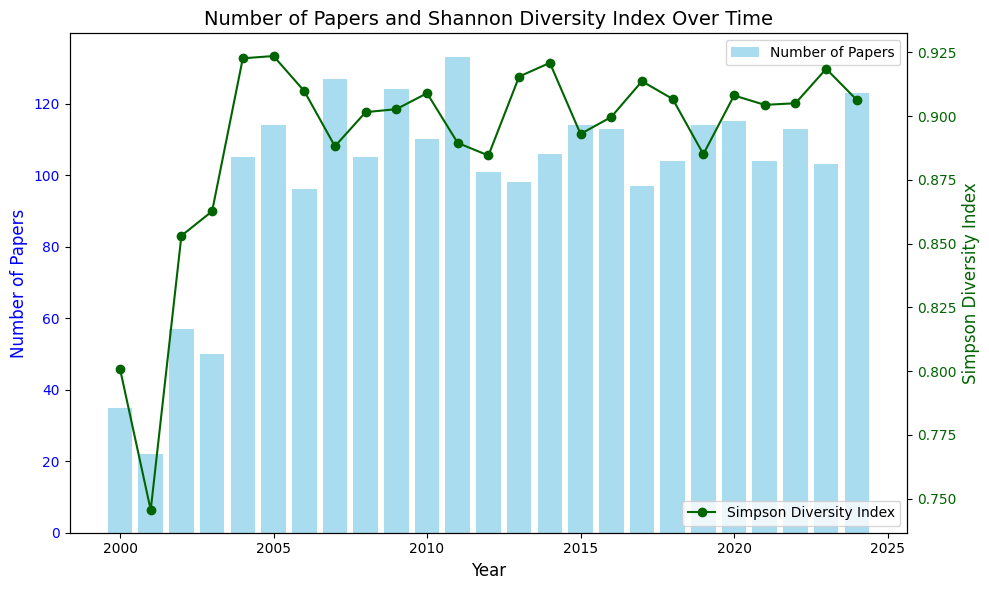

In [11]:
def simpsons_diversity(proportions):
    """Calculate Simpson's Diversity Index."""
    proportions = np.array(proportions, dtype=np.float64)
    proportions = proportions[proportions > 0]
    return 1 - np.sum(proportions**2)

simpson_data = []
for year, group in df.groupby('Year'):
    countries = (
        group['Affiliation country']
        .dropna()
        .str.split(',')
        .explode()
        .str.strip()  # Fix trailing spaces
    )
    country_counts = countries.value_counts()
    total_affiliations = country_counts.sum()
    proportions = country_counts / total_affiliations  # Calculate proportions
    simpson_index = simpsons_diversity(proportions)  # Calculate Simpson's Index
    simpson_data.append((year, simpson_index))

simpson_df = pd.DataFrame(simpson_data, columns=['Year', 'Simpson_Diversity_Index'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Number of Papers and Shannon Diversity Index Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(simpson_df['Year'], simpson_df['Simpson_Diversity_Index'], color='darkgreen', marker='o', label='Simpson Diversity Index')
ax2.set_ylabel('Simpson Diversity Index', fontsize=12, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

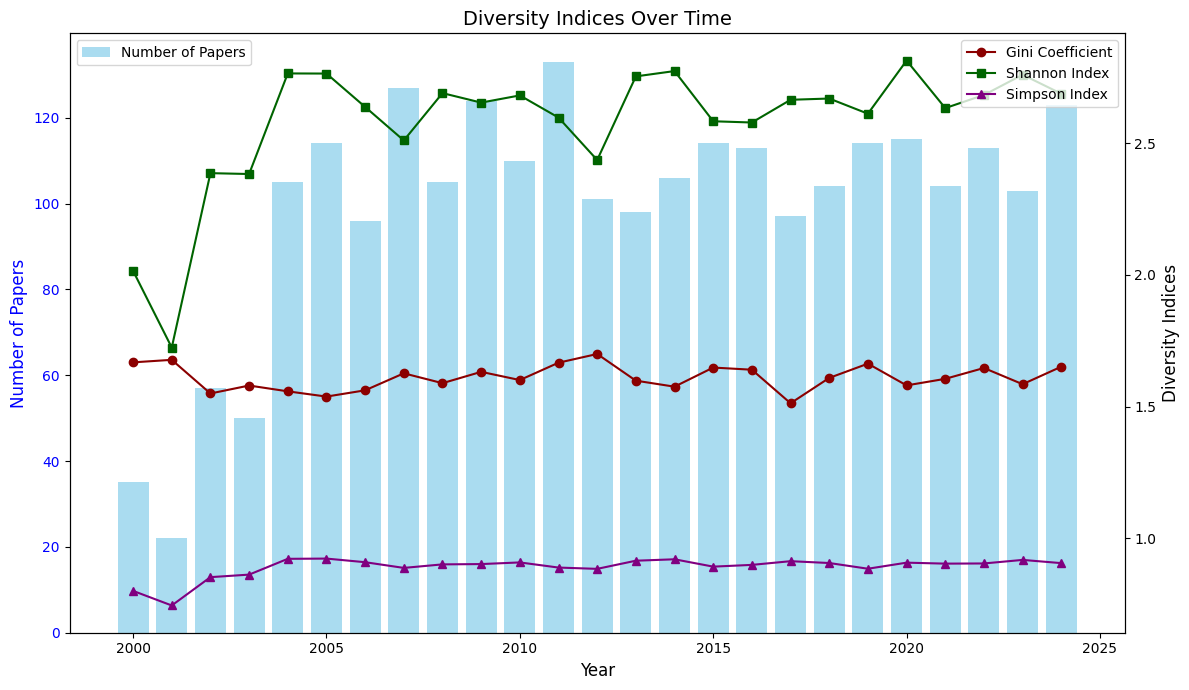

In [12]:
combined_df = (
    pd.merge(normalized_gini_df, shannon_df, on='Year', how='inner')
    .merge(simpson_df, on='Year', how='inner')
)
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Diversity Indices Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(combined_df['Year'], combined_df['Normalized_Gini_Coefficient'], 
         color='darkred', marker='o', label='Gini Coefficient')
ax2.plot(combined_df['Year'], combined_df['Shannon_Diversity_Index'], 
         color='darkgreen', marker='s', label='Shannon Index')
ax2.plot(combined_df['Year'], combined_df['Simpson_Diversity_Index'], 
         color='purple', marker='^', label='Simpson Index')
ax2.set_ylabel('Diversity Indices', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

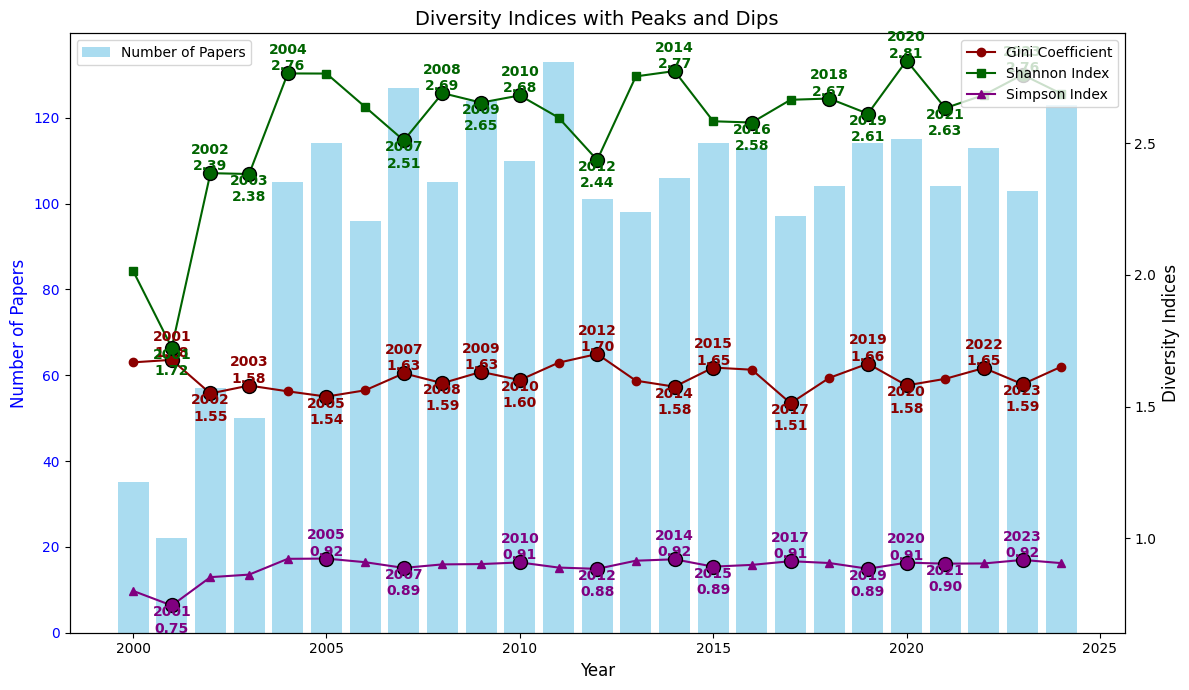

In [15]:
import scipy.signal

def find_extrema(series):
    maxima = scipy.signal.argrelextrema(series.values, np.greater)[0]  # Peaks
    minima = scipy.signal.argrelextrema(series.values, np.less)[0]  # Dips
    return series.iloc[maxima], series.iloc[minima]

gini_peaks, gini_dips = find_extrema(combined_df.set_index('Year')['Normalized_Gini_Coefficient'])
shannon_peaks, shannon_dips = find_extrema(combined_df.set_index('Year')['Shannon_Diversity_Index'])
simpson_peaks, simpson_dips = find_extrema(combined_df.set_index('Year')['Simpson_Diversity_Index'])


fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Diversity Indices with Peaks and Dips', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(combined_df['Year'], combined_df['Normalized_Gini_Coefficient'], 
         color='darkred', marker='o', label='Gini Coefficient')
ax2.plot(combined_df['Year'], combined_df['Shannon_Diversity_Index'], 
         color='darkgreen', marker='s', label='Shannon Index')
ax2.plot(combined_df['Year'], combined_df['Simpson_Diversity_Index'], 
         color='purple', marker='^', label='Simpson Index')

for series, color, label in [(gini_peaks, 'darkred', 'Gini Peak'), 
                              (gini_dips, 'darkred', 'Gini Dip'),
                              (shannon_peaks, 'darkgreen', 'Shannon Peak'), 
                              (shannon_dips, 'darkgreen', 'Shannon Dip'),
                              (simpson_peaks, 'purple', 'Simpson Peak'), 
                              (simpson_dips, 'purple', 'Simpson Dip')]:
    for year, value in series.items():
        ax2.scatter(year, value, color=color, s=100, edgecolors='black', zorder=3)  # Highlight points
        ax2.text(year, value, f"{year}\n{value:.2f}", fontsize=10, 
                 ha='center', va='bottom' if 'Peak' in label else 'top', 
                 color=color, fontweight='bold')

ax2.set_ylabel('Diversity Indices', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Interpretation:
A high Shannon or Simpson Index peak suggests a year with greater country diversity in affiliations.
    - Shannon and Simpson Index are not peaking at the same time (only on 2010, 2014, 2020, 2023).
A high Gini peak means affiliation inequality increased (few countries dominated).
    - Although the peaks have changed throughout the years, the overall tendency has been maintained. 
A dip in Shannon/Simpson and a peak in Gini suggests increasing Western-centricity.
    - 2001, 2003, 2007, 2009, 2012, 2019

Would need help relating these peaks and dips to moments for diversity in the conference. 


# Network analysis
Analyze the co-authorship or affiliation networks for geographic and institutional diversity.

I tried variations of this but tbh, I'm not sure that it is very readable (or understandable), but maybe someone else can give it shot?


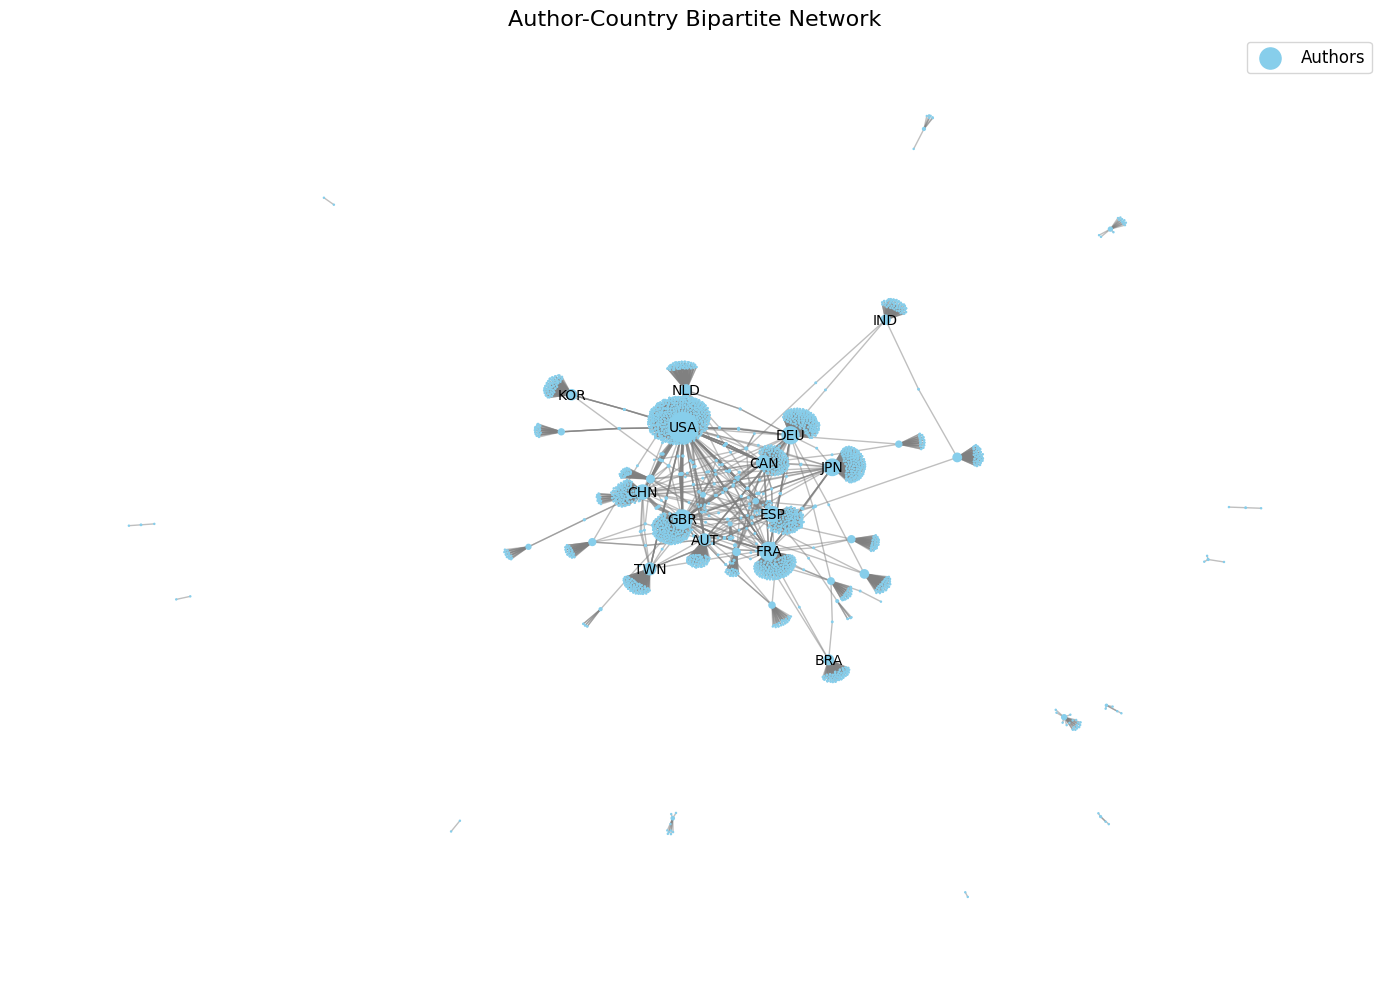

'\nimport plotly.graph_objects as go\nfrom networkx.drawing.layout import spring_layout\n\n# Convert positions to 2D array for Plotly\npos_2d = spring_layout(B, seed=42)\nx, y = zip(*[pos_2d[n] for n in B.nodes])\n\n# Create scatter plot for authors\nauthor_nodes = [node for node in B.nodes if node in authors]\nauthor_x = [pos_2d[n][0] for n in author_nodes]\nauthor_y = [pos_2d[n][1] for n in author_nodes]\n\n# Create scatter plot for countries\ncountry_nodes = [node for node in B.nodes if node in countries]\ncountry_x = [pos_2d[n][0] for n in country_nodes]\ncountry_y = [pos_2d[n][1] for n in country_nodes]\n\n# Plot with Plotly\nfig = go.Figure()\n\n# Authors\nfig.add_trace(go.Scatter(x=author_x, y=author_y, mode=\'markers\',\n                         marker=dict(size=10, color=\'skyblue\'), name="Authors"))\n\n# Countries\nfig.add_trace(go.Scatter(x=country_x, y=country_y, mode=\'markers\',\n                         marker=dict(size=10, color=\'lightgreen\'), name="Countries"))\n\nf

In [21]:
# Idea on network analysis
import networkx as nx

# Step 1: Prepare edges for a bipartite graph
edges = []
for _, row in df.iterrows():
    authors = row['Authors'].split(';')  # Split authors
    countries = row['Affiliation country'].split(',')  # Split country codes
    for author, country in zip(authors, countries):
        edges.append((author.strip(), country.strip()))  # Add edges between authors and countries

# Step 2: Create a bipartite graph
B = nx.Graph()
B.add_edges_from(edges)

# Step 3: Separate Authors and Countries
authors = {node for node, degree in B.degree if any(node in edge for edge in edges)}
countries = set(B) - authors

# Step 4: Analyze centrality and node sizes
degree_centrality = nx.degree_centrality(B)
node_size = {node: degree_centrality[node] * 2000 for node in B.nodes}  # Store node sizes in a dictionary
pos = nx.spring_layout(B, seed=42)  # General layout for better separation

# Draw the network
plt.figure(figsize=(14, 10))

# Draw authors (blue nodes)
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=list(authors),
    node_color="skyblue",
    node_size=[node_size[n] for n in authors],
    label="Authors"
)

# Draw countries (green nodes)
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=list(countries),
    node_color="lightgreen",
    node_size=[node_size[n] for n in countries],
    label="Countries"
)

# Draw edges
nx.draw_networkx_edges(B, pos, edge_color="gray", alpha=0.5)

# Step 6: Add selective labels (only for high-degree nodes)
# Define threshold for labeling important nodes
label_threshold = 0.02  # Adjust as needed (higher means fewer labels)
labels = {node: node for node, centrality in degree_centrality.items() if centrality > label_threshold}
nx.draw_networkx_labels(B, pos, labels=labels, font_size=10)

# Add title and legend
plt.title("Author-Country Bipartite Network", fontsize=16)
plt.legend(scatterpoints=1, loc="best", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()
"""
import plotly.graph_objects as go
from networkx.drawing.layout import spring_layout

# Convert positions to 2D array for Plotly
pos_2d = spring_layout(B, seed=42)
x, y = zip(*[pos_2d[n] for n in B.nodes])

# Create scatter plot for authors
author_nodes = [node for node in B.nodes if node in authors]
author_x = [pos_2d[n][0] for n in author_nodes]
author_y = [pos_2d[n][1] for n in author_nodes]

# Create scatter plot for countries
country_nodes = [node for node in B.nodes if node in countries]
country_x = [pos_2d[n][0] for n in country_nodes]
country_y = [pos_2d[n][1] for n in country_nodes]

# Plot with Plotly
fig = go.Figure()

# Authors
fig.add_trace(go.Scatter(x=author_x, y=author_y, mode='markers',
                         marker=dict(size=10, color='skyblue'), name="Authors"))

# Countries
fig.add_trace(go.Scatter(x=country_x, y=country_y, mode='markers',
                         marker=dict(size=10, color='lightgreen'), name="Countries"))

fig.update_layout(title="Interactive Author-Country Bipartite Network",
                  showlegend=True, hovermode="closest")
fig.show()
"""

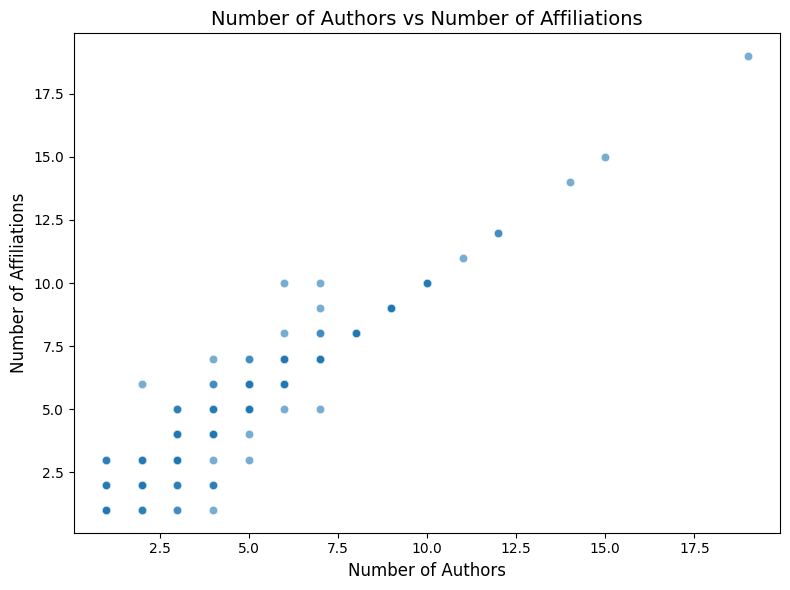

In [13]:
df['num_authors'] = df['Authors'].str.split(';').apply(len)
df['num_affiliations'] = df['aff_names'].str.split(',').apply(len)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='num_authors', y='num_affiliations', alpha=0.6)
plt.title('Number of Authors vs Number of Affiliations', fontsize=14)
plt.xlabel('Number of Authors', fontsize=12)
plt.ylabel('Number of Affiliations', fontsize=12)
plt.tight_layout()
plt.show()


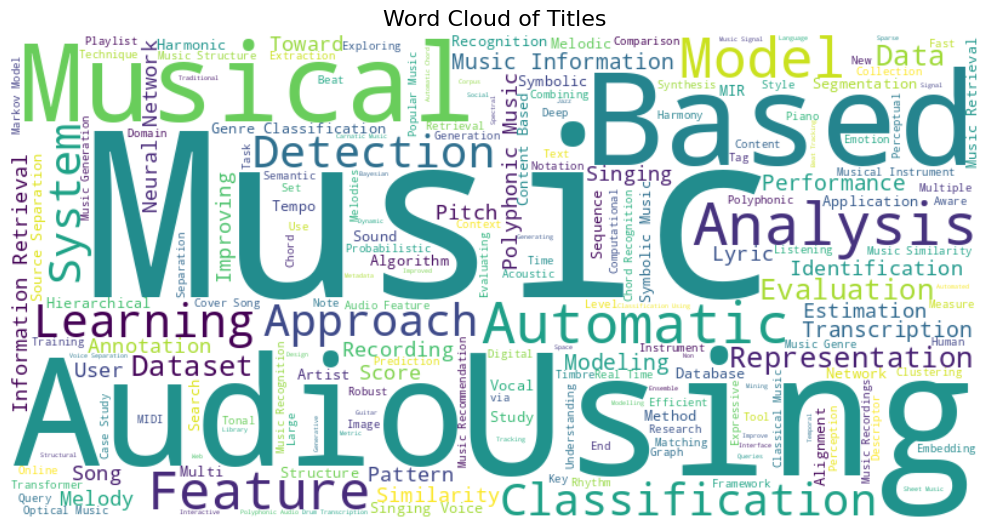

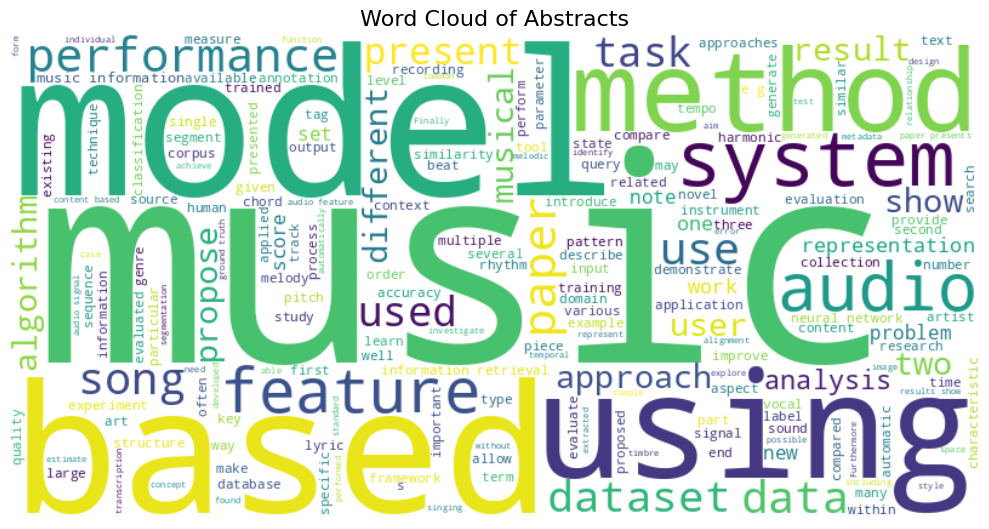

In [14]:
from wordcloud import WordCloud

text_ttl = ' '.join(df['Title'].dropna().tolist())
text_abs = ' '.join(df['Abstract'].dropna().tolist())
wordcloud_ttl = WordCloud(width=800, height=400, background_color='white').generate(text_ttl)
wordcloud_abs = WordCloud(width=800, height=400, background_color='white').generate(text_abs)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ttl, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_abs, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts', fontsize=16)
plt.tight_layout()
plt.show()

Maybe this could be interesting if we remove some stopwords: music, audio, using, based, ...
Also could be interesting to check bi-grams or tri-grams.
